# Espinardo Fluo 2ba

#### Fluo 2ba measurements @ Espinardo campus

- Sample 2 ba: Molecule with 10^14 mol/cm3

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [3]:
from IPython.display import Image as IM
from IPython.display import Math
from IPython.display import Latex

In [4]:
from PIL import Image, ImageFilter
from functools import reduce

In [5]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Wed May 15 14:22:03 2019


In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tables            as tb
import random
import glob
import warnings
sns.set()

In [7]:
from sabat.sbt_espinardo import get_jpeg_dirs
from sabat.sbt_espinardo import get_files
from sabat.sbt_espinardo import read_xls_files
from sabat.sbt_espinardo import sort_by_list
from sabat.sbt_espinardo import sort_files
from sabat.sbt_espinardo import load_LIVE_images
from sabat.sbt_espinardo import expo_seed
from sabat.sbt_espinardo import  get_live_dirs
from sabat.sbt_espinardo import get_profile
from sabat.sbt_espinardo import display_profile
from sabat.sbt_espinardo import display_profiles_before_after
from sabat.sbt_espinardo import plot_LIVE_images
from sabat.sbt_espinardo import plot_LIVE_avg
from sabat.sbt_espinardo import plot_avg_intensity
from sabat.sbt_espinardo import plot_total_intensity
from sabat.sbt_espinardo import avg_intensity
from sabat.sbt_espinardo import total_intensity
from sabat.sbt_espinardo import plot_TOM

from sabat.sbt_espinardo import get_TOM_files
from sabat.sbt_espinardo import display_profiles
from sabat.sbt_espinardo import show_toms
from sabat.sbt_espinardo import mean_and_std_toms
from sabat.sbt_espinardo import tom_I, tom_mean_I
from sabat.sbt_espinardo import fit_intensity, tom_I_max

In [8]:
from  invisible_cities.core.system_of_units import *

In [9]:
import invisible_cities.core .fit_functions  as     fitf

In [10]:
from sabat.sbt_types import FoV, CircularFoV, Monolayer
from sabat.sbt_types import Laser, PulsedLaser, GLaser, GaussianBeam
from sabat.sbt_types import Molecule
from sabat.sbt_types import Molecule2P
from sabat.sbt_types import DyeSample
from sabat.sbt_types import Microscope
from sabat.sbt_types import CCD
from sabat.sbt_core import  Setup
from sabat.sbt_core import  power_density
from sabat.sbt_core import  photon_density
from sabat.sbt_core import  fluorescence_per_molecule
from sabat.sbt_core import  duration_of_fluorescence
from sabat.sbt_core import  diffraction_limit
from sabat.sbt_core import  photoelectrons_per_pixel
from sabat.sbt_core import  fluorescence_2p_gb
from sabat.sbt_core import  fluorescence_2p_dl
from sabat.sbt_core import  absorbed_photons_per_fluorophore_per_pulse_2p
from sabat.sbt_types import  photon, molecule, GM, us, ucm2, ucm3, gp 

In [11]:
from sabat.sbt_core  import  FIB 
from sabat.sbt_core  import  FLUO3

In [12]:
path = '/Users/jjgomezcadenas/Projects/Development/data/2Photon/'

In [13]:
ipath = os.path.join(path, 'sample_2ba')
print(ipath)

/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_2ba


## Sample 2ba

### TOM files

In [14]:
TOM = get_TOM_files(ipath)
print(list(TOM.keys()))

['TOMO00_800nm_400mW_S1_2micafter300mW', 'TOMO00_800nm_400mW_S1_2micafter200mW', 'TOMO00_800nm_200mW_S1_2micbefore100mW', 'TOMO00_800nm_400mW_S1_2micafter100mW', 'TOMO00_800nm_400mW_S1_2micbefore400mW', 'TOMO00_800nm_400mW_S1_2micafter400mW', 'TOMO00_800nm_400mW_S1_2micbefore100mW', 'TOMO00_800nm_400mW_S1_2micbefore200mW', 'TOMO00_800nm_400mW_S1_2micbefore300mW']


In [15]:
tom100mWa  = read_xls_files(TOM['TOMO00_800nm_400mW_S1_2micafter100mW'])
tom100mWb  = read_xls_files(TOM['TOMO00_800nm_200mW_S1_2micbefore100mW'])
tom300mWa  = read_xls_files(TOM['TOMO00_800nm_400mW_S1_2micafter300mW'])
tom200mWa  = read_xls_files(TOM['TOMO00_800nm_400mW_S1_2micafter200mW'])
tom400mWb  = read_xls_files(TOM['TOMO00_800nm_400mW_S1_2micbefore400mW'])
tom400mWa  = read_xls_files(TOM['TOMO00_800nm_400mW_S1_2micafter400mW'])
tom200mWb = read_xls_files(TOM['TOMO00_800nm_400mW_S1_2micbefore200mW']) 
tom300mWb = read_xls_files(TOM['TOMO00_800nm_400mW_S1_2micbefore300mW']) 


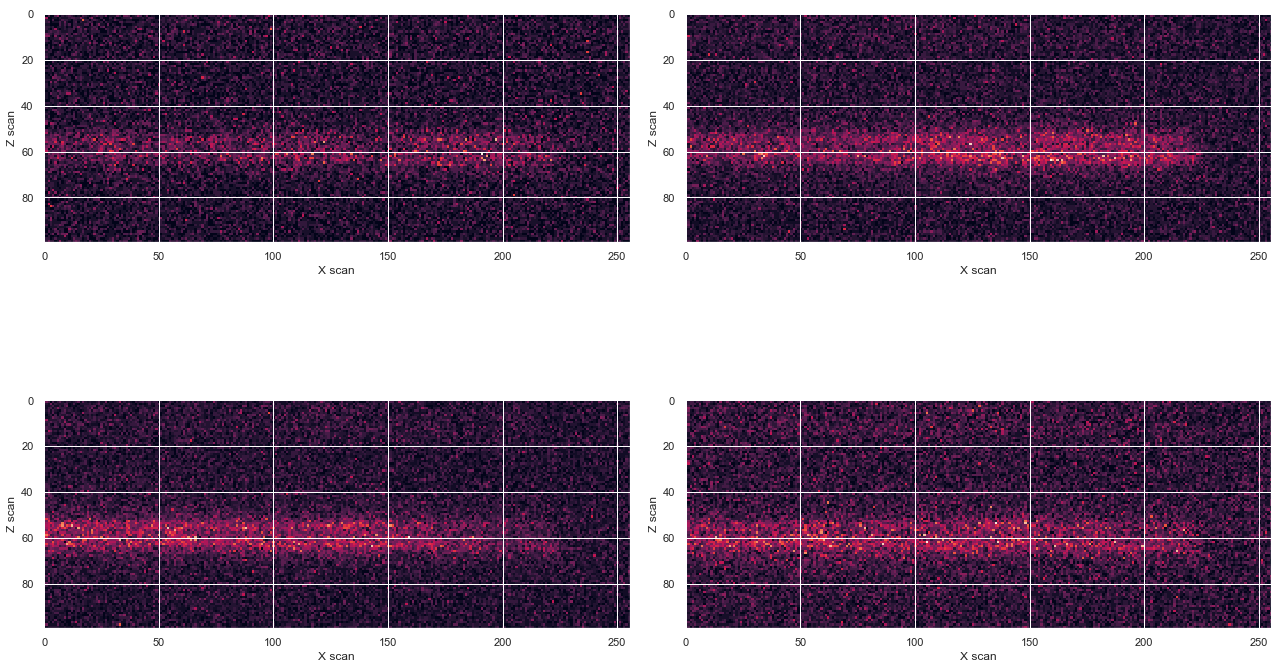

In [16]:
show_toms((tom100mWb, tom100mWa, tom200mWb, tom200mWa), nx = 2, ny =2, figsize=(18,12))

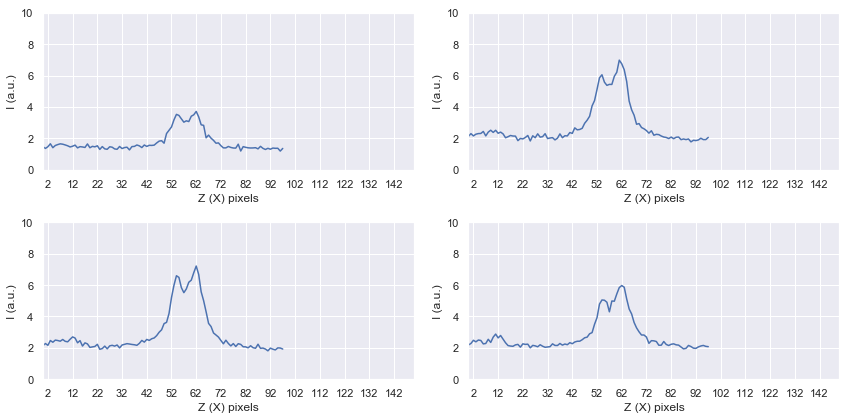

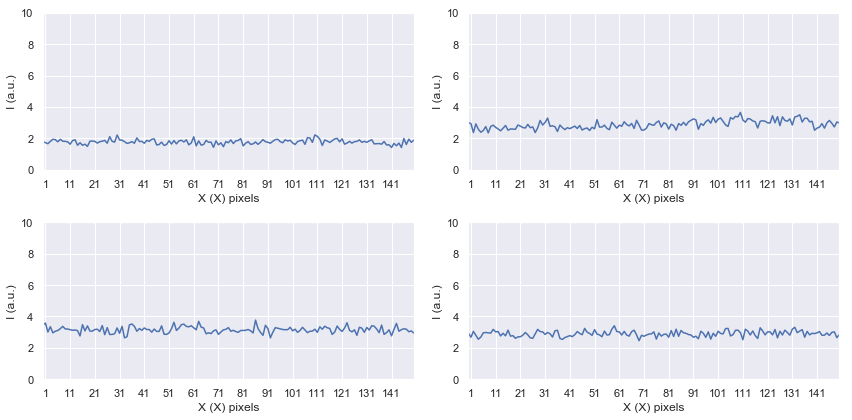

In [17]:
display_profiles((tom100mWb, tom100mWa, tom200mWb, tom200mWa), 
                 zrange=(0,150), yrange=(0,10), nx = 2, ny =2, figsize=(12,6))

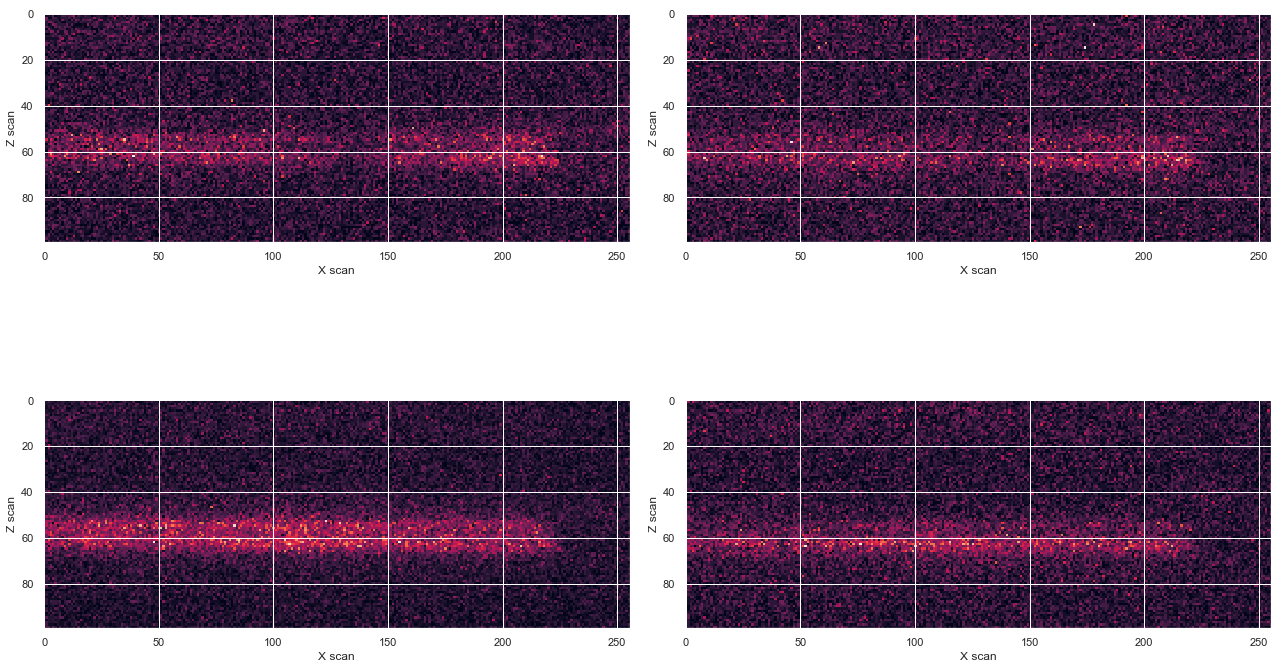

In [18]:
show_toms((tom300mWb, tom300mWa, tom400mWb, tom400mWa), nx = 2, ny =2, figsize=(18,12))

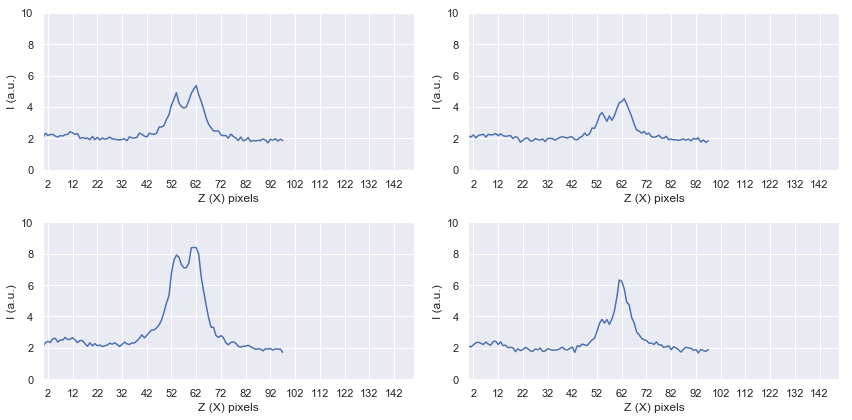

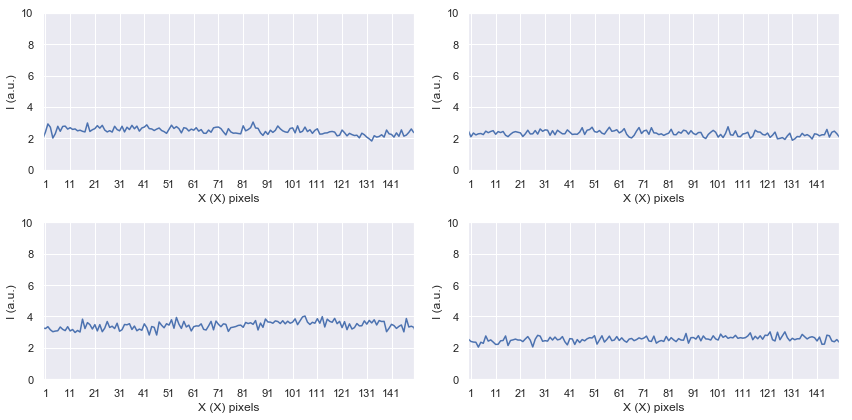

In [19]:
display_profiles((tom300mWb, tom300mWa, tom400mWb, tom400mWa), zrange=(0,150), yrange=(0,10), nx = 2, ny =2, figsize=(12,6))

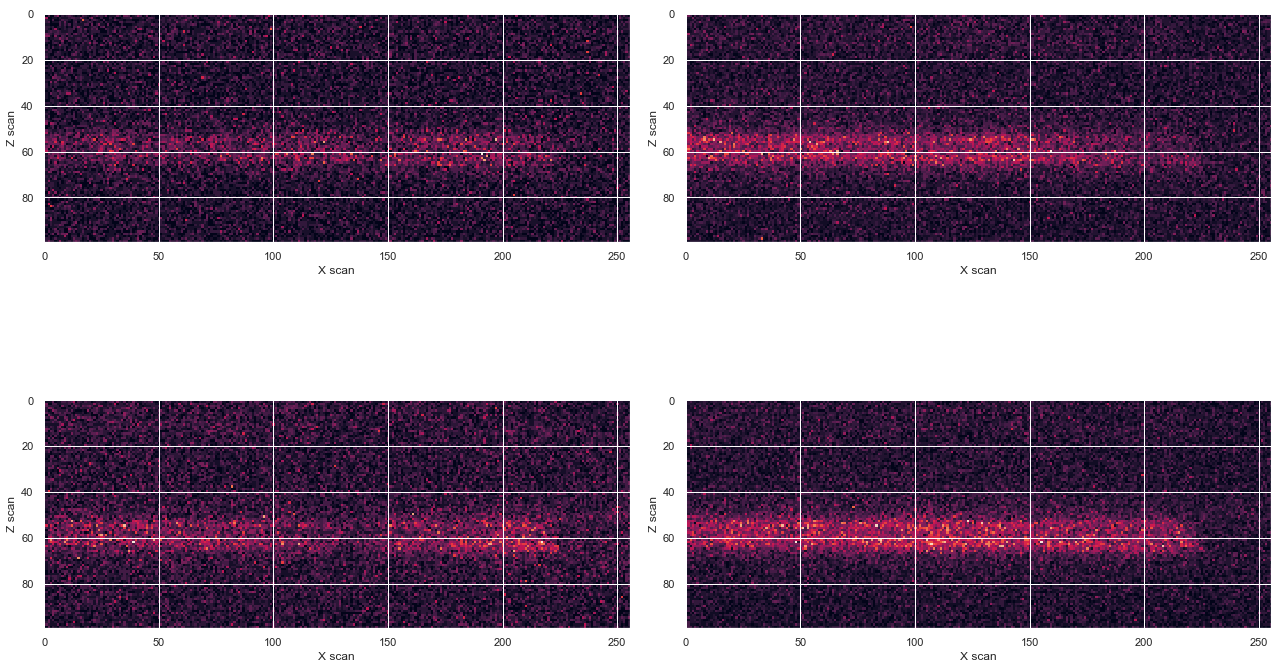

In [43]:
show_toms((tom100mWb, tom200mWb, tom300mWb, tom400mWb), nx = 2, ny =2, figsize=(18,12))

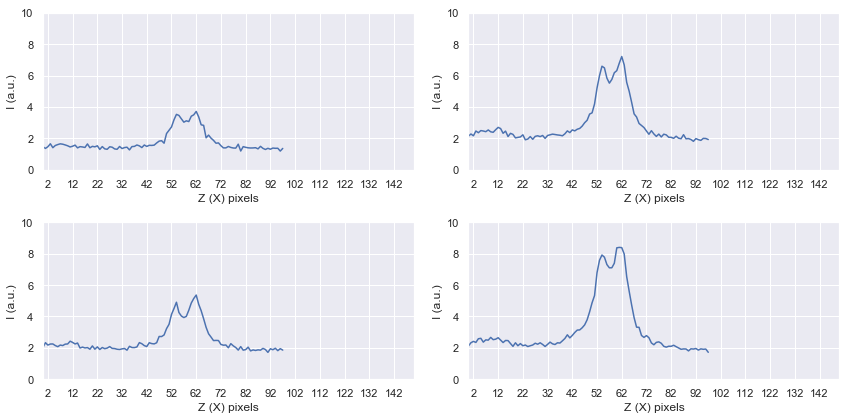

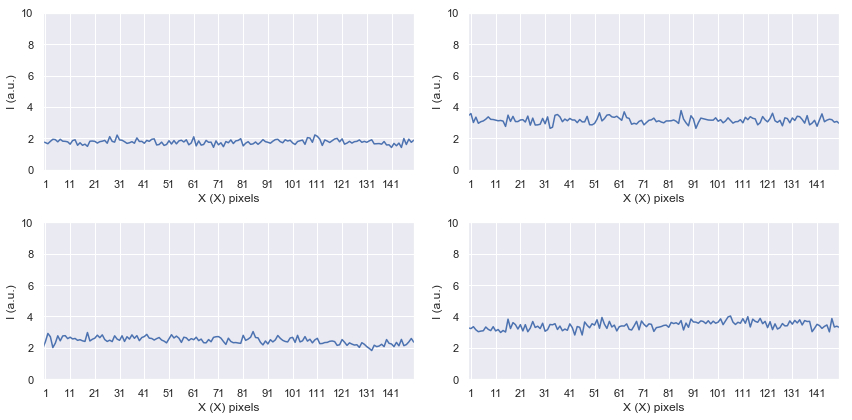

In [21]:
display_profiles((tom100mWb, tom200mWb, tom300mWb, tom400mWb), 
                 zrange=(0,150), yrange=(0,10), nx = 2, ny =2, figsize=(12,6))

[100, 200, 300, 400]
[3.71484375, 7.2109375, 5.36328125, 8.3984375]
[1.92739299 2.68531888 2.31587591 2.89800578]


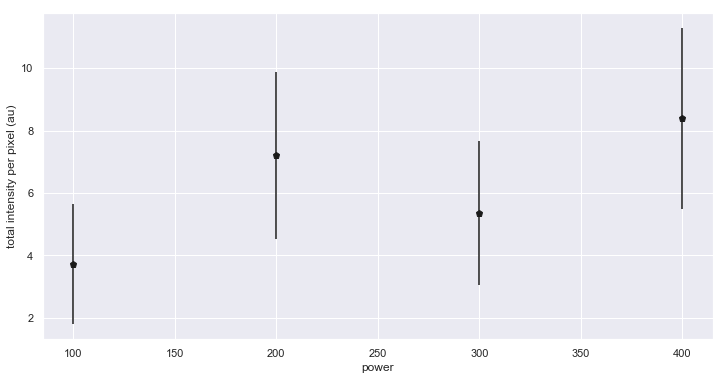

In [20]:
I = tom_I_max((tom100mWb, tom200mWb, tom300mWb, tom400mWb))
sigma = np.sqrt(I) 
X=[100,200,300,400]
print(X)
print(I)
print(sigma)
fig = plt.figure(figsize=(12,6))
ax      = fig.add_subplot(1, 1, 1)
#f    = fitf.fit(fitf.polynom, X, I, sigma= sigma)
plt.errorbar(X ,I, yerr = sigma, fmt="kp", ms=7, ls='none')
#plt.plot(X, f.fn(X), lw=3)
plt.xlabel('power')
plt.ylabel('total intensity per pixel (au)')
plt.show()
#print(f'Fit function -->{f}')

#### ???

## LIVE

In [22]:
LIVE = get_live_dirs(path, sample='sample_2ba')

{'LIVE00_300mW_TPEF': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_2ba/LIVE00_800nm_300mW_S1_TPEF/jpeg', 'LIVE00_200mW_TPEF': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_2ba/LIVE00_800nm_200mW_S1_TPEF/jpeg', 'LIVE00_400mW_TPEF': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_2ba/LIVE00_800nm_400mW_S1_TPEF/jpeg', 'LIVE00_100mW_TPEF': '/Users/jjgomezcadenas/Projects/Development/data/2Photon/sample_2ba/LIVE00_800nm_100mW_S1_TPEF/jpeg'}


In [23]:
list(LIVE.keys())

['LIVE00_300mW_TPEF',
 'LIVE00_200mW_TPEF',
 'LIVE00_400mW_TPEF',
 'LIVE00_100mW_TPEF']

### LIVE -- 100 mW

In [24]:
files = glob.glob(LIVE['LIVE00_100mW_TPEF']+'/*.jpg')

In [25]:
sfiles = sort_files(files)

In [26]:
LDF100 = load_LIVE_images(sfiles)

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


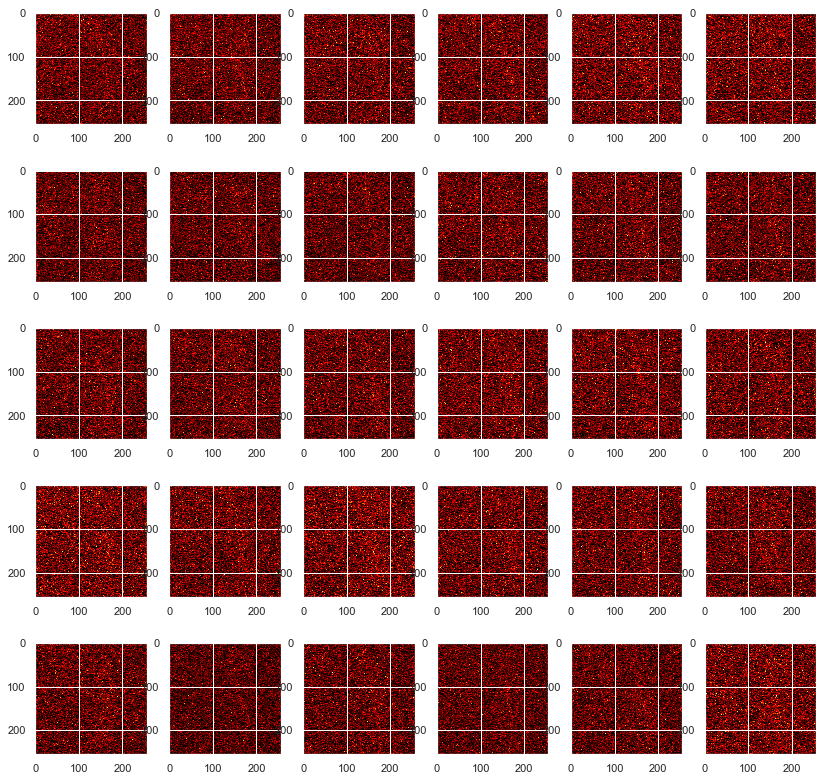

In [27]:
plot_LIVE_images(LDF100, nx=5, ny=6, figsize=(14,14))

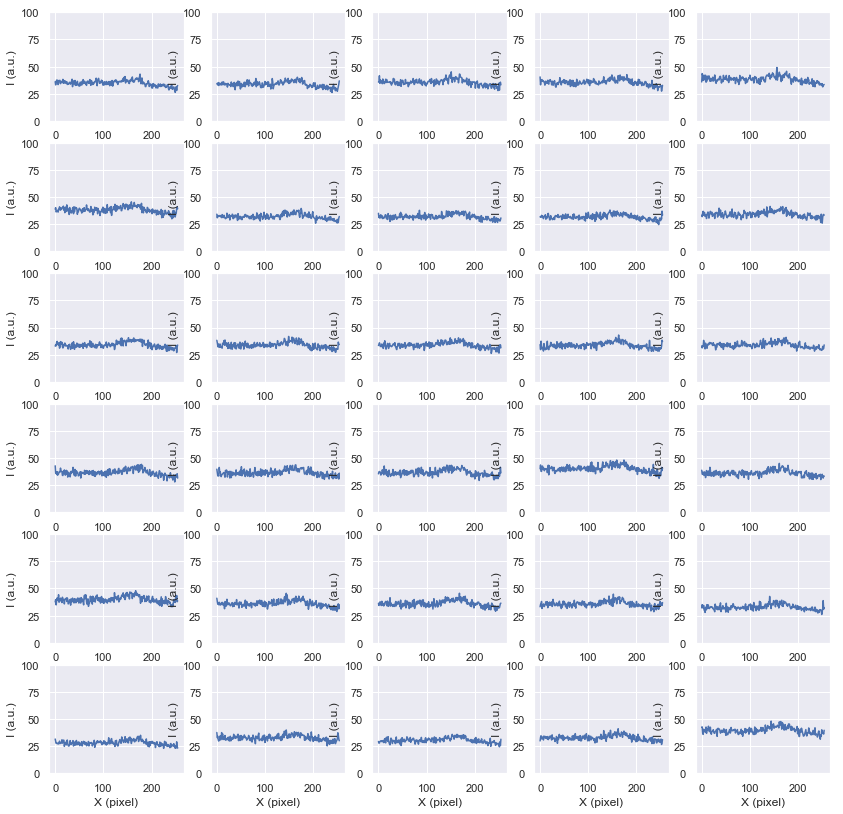

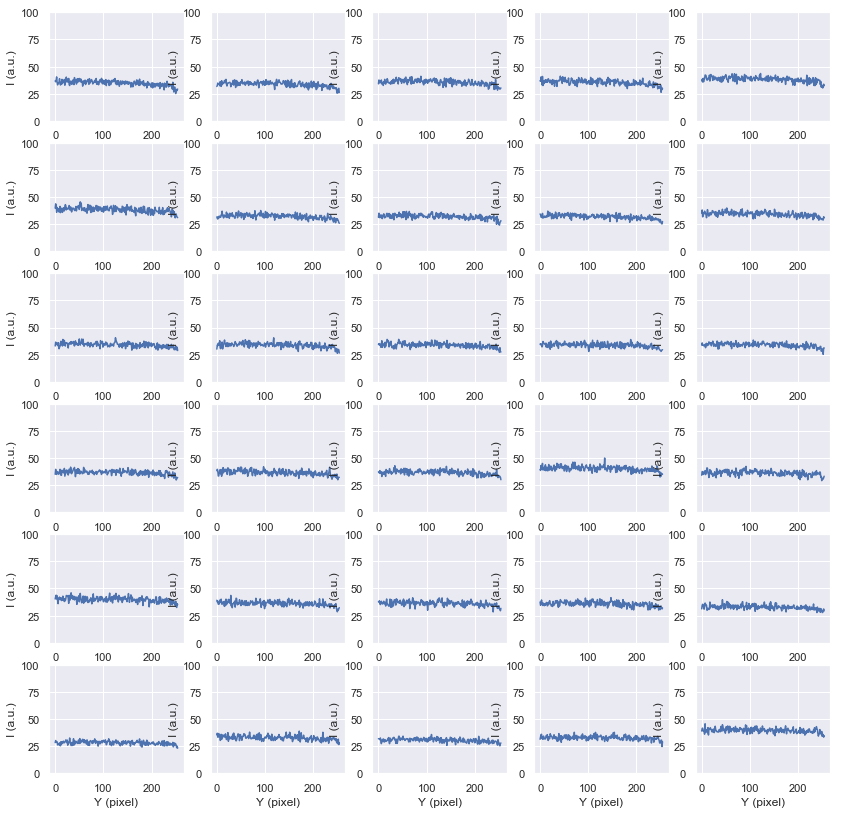

In [36]:
plot_LIVE_avg(LDF100, xpixel =(0, 255), ypixel = (0,255), imax=100, nx=6, ny=5, figsize=(14,14))

 average intensity per pixel = 34.85356903076172 +- 2.7321147469834015


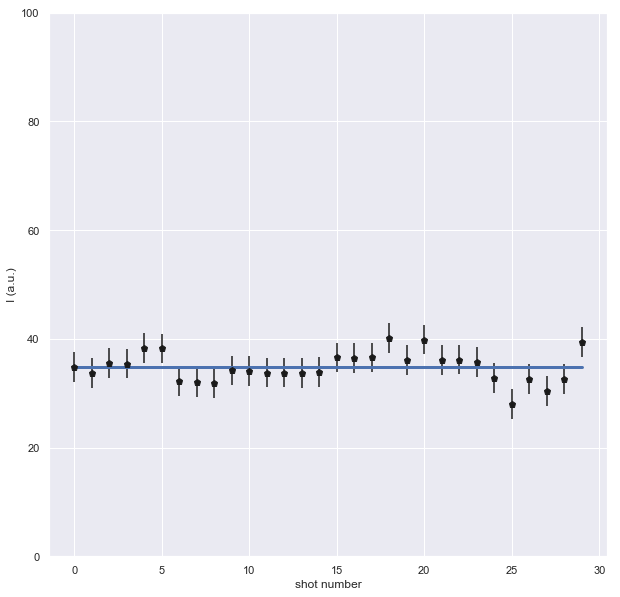

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1d1bb048>, values=array([3.48535681e+01, 4.33397477e+08]), errors=array([8.68110733e-01, 2.81610265e+14]), chi2=1.0714286025390478, pvalue=0.36321780063824927, cov=array([[7.53616245e-01, 2.00082305e+14],
       [2.00082305e+14, 7.93043413e+28]]))


In [39]:
avg_ldf100= np.mean(avg_intensity(LDF100))
std_ldf100 = np.std(avg_intensity(LDF100))
print(f' average intensity per pixel = {avg_ldf100} +- {std_ldf100}')
fit_df100, err_df100 = fit_intensity(LDF100, sigma=std_ldf100, imax=100, figsize=(10,10))

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


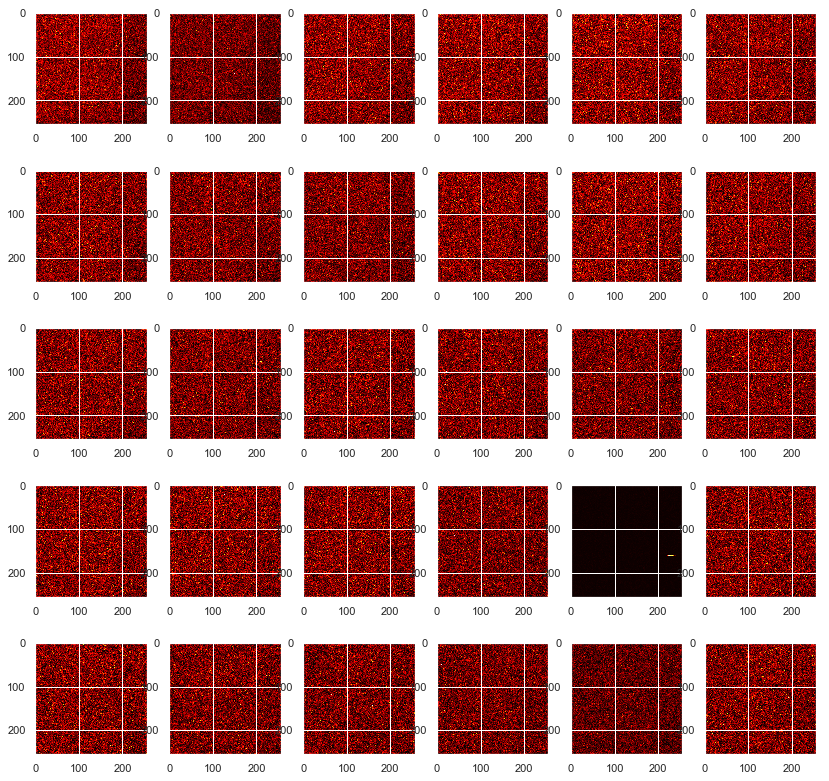

In [40]:
files = glob.glob(LIVE['LIVE00_200mW_TPEF']+'/*.jpg')
sfiles = sort_files(files)
LDF200 = load_LIVE_images(sfiles)
plot_LIVE_images(LDF200, nx=5, ny=6, figsize=(14,14))

 average intensity per pixel = 42.90704345703125 +- 8.637551825291014


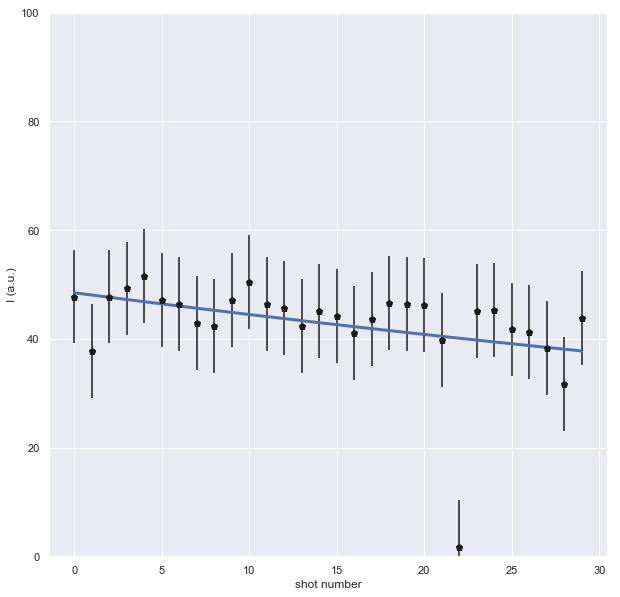

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1f1c3c80>, values=array([  48.47114498, -116.32021538]), errors=array([ 3.25791216, 57.67542422]), chi2=0.9228789756171086, pvalue=0.5818054268757193, cov=array([[  10.61399163,  157.50778471],
       [ 157.50778471, 3326.45455938]]))


In [41]:
avg_ldf200= np.mean(avg_intensity(LDF200))
std_ldf200 = np.std(avg_intensity(LDF200))
print(f' average intensity per pixel = {avg_ldf200} +- {std_ldf200}')
fit_df200, err_df200 = fit_intensity(LDF200, sigma=std_ldf200, imax=100, figsize=(10,10))

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


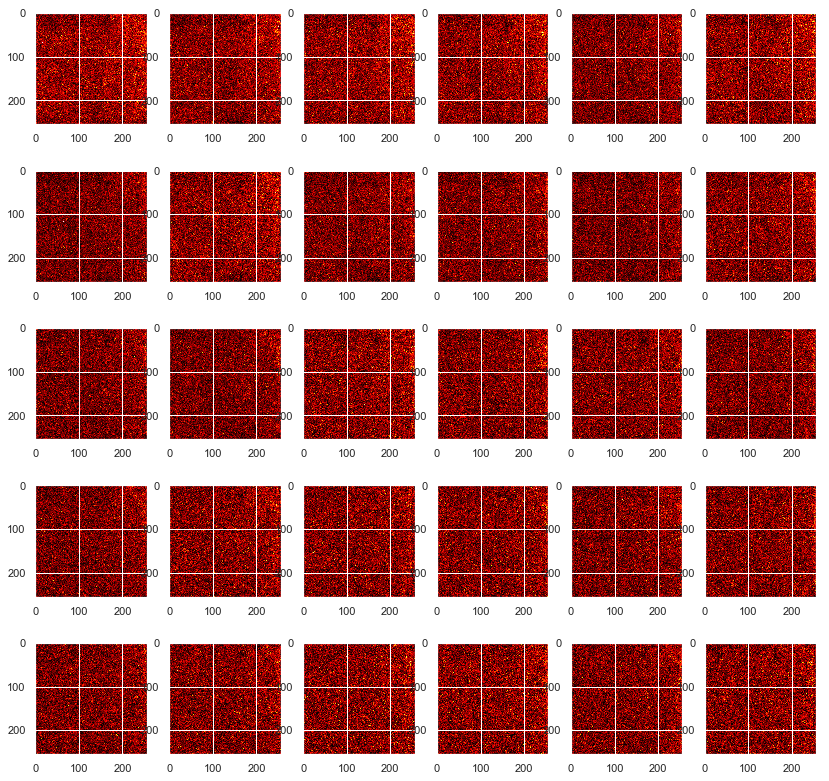

In [34]:
files = glob.glob(LIVE['LIVE00_300mW_TPEF']+'/*.jpg')
sfiles = sort_files(files)
LDF300 = load_LIVE_images(sfiles)
plot_LIVE_images(LDF300, nx=5, ny=6, figsize=(14,14))

 average intensity per pixel = 46.664990234375 +- 3.639027492917726


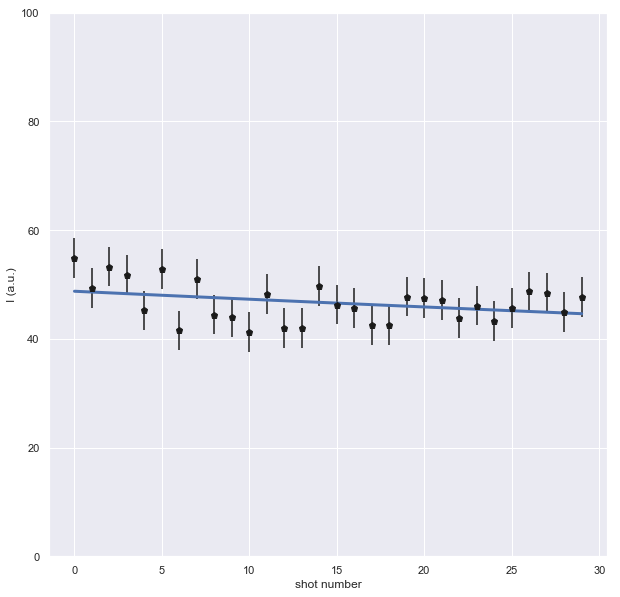

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1e7b3730>, values=array([  48.75924731, -327.59382966]), errors=array([  1.32342571, 176.59239504]), chi2=0.952843452263889, pvalue=0.535740618048303, cov=array([[1.75145561e+00, 1.98997773e+02],
       [1.98997773e+02, 3.11848740e+04]]))


In [35]:
avg_ldf300= np.mean(avg_intensity(LDF300))
std_ldf300 = np.std(avg_intensity(LDF300))
print(f' average intensity per pixel = {avg_ldf300} +- {std_ldf300}')
fit_df300, err_df300 = fit_intensity(LDF300, sigma=std_ldf300, imax=100, figsize=(10,10))

Loading files corresponding to shots ['shot1', 'shot2', 'shot3', 'shot4', 'shot5', 'shot6', 'shot7', 'shot8', 'shot9', 'shot10', 'shot11', 'shot12', 'shot13', 'shot14', 'shot15', 'shot16', 'shot17', 'shot18', 'shot19', 'shot20', 'shot21', 'shot22', 'shot23', 'shot24', 'shot25', 'shot26', 'shot27', 'shot28', 'shot29', 'shot30']


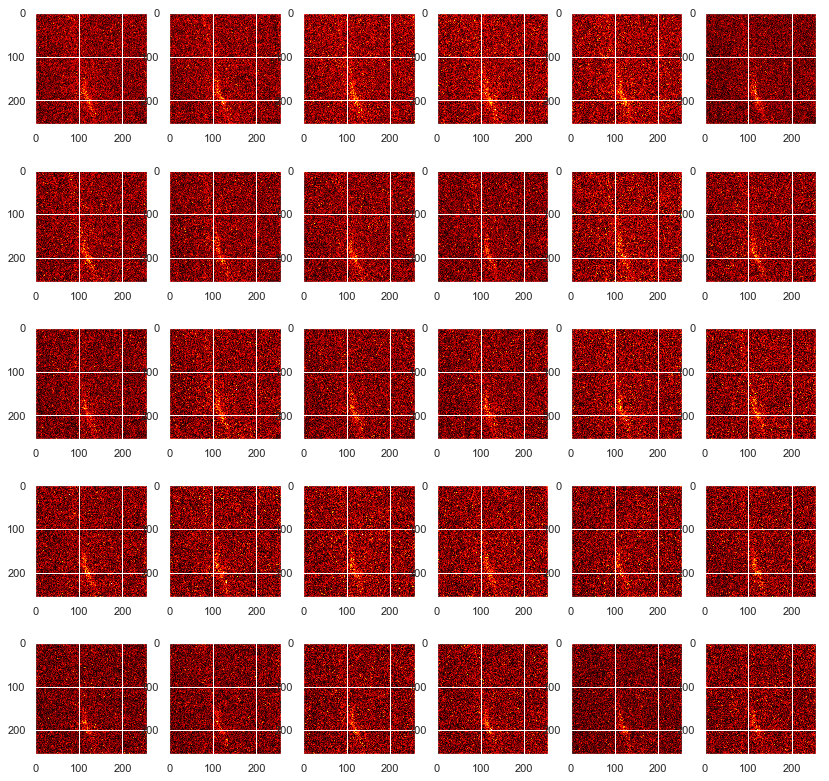

In [36]:
files = glob.glob(LIVE['LIVE00_400mW_TPEF']+'/*.jpg')
sfiles = sort_files(files)
LDF400 = load_LIVE_images(sfiles)
plot_LIVE_images(LDF400, nx=5, ny=6, figsize=(14,14))

 average intensity per pixel = 48.82599436442057 +- 4.238066627341856


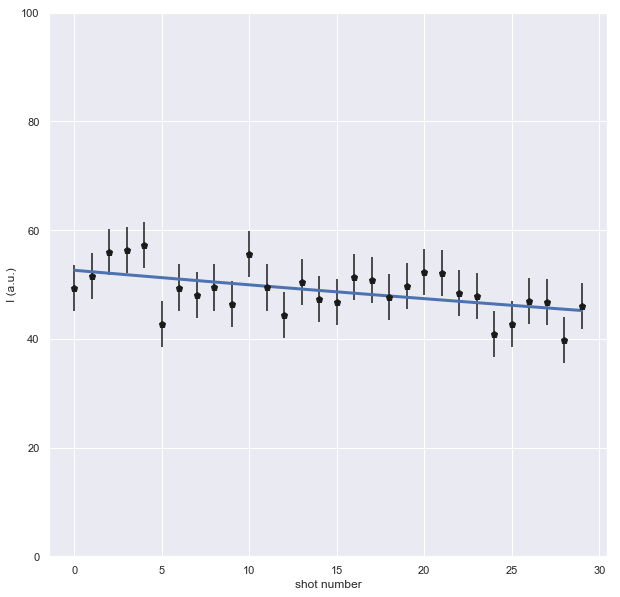

Fit function -->FitFunction(fn=<function fit.<locals>.<lambda> at 0x1a1cbf4f28>, values=array([  52.61562706, -191.38122058]), errors=array([ 1.56375004, 67.15628317]), chi2=0.7784453255893247, pvalue=0.7906257237531529, cov=array([[2.44531419e+00, 8.88772945e+01],
       [8.88772945e+01, 4.50996637e+03]]))


In [37]:
avg_ldf400= np.mean(avg_intensity(LDF400))
std_ldf400 = np.std(avg_intensity(LDF400))
print(f' average intensity per pixel = {avg_ldf400} +- {std_ldf400}')
fit_df400, err_df400 = fit_intensity(LDF400, sigma=std_ldf400, imax=100, figsize=(10,10))

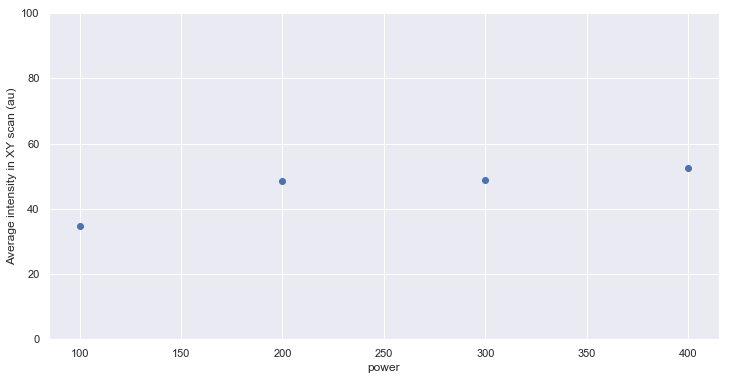

In [42]:
X = np.array([100,200,300,400])
Y = np.array([fit_df100[0],fit_df200[0],fit_df300[0],fit_df400[0]])
fig = plt.figure(figsize=(12,6))
ax  = fig.add_subplot(1, 1, 1)
    
plt.plot(X, Y, 'bo')
plt.ylim(0,100)
plt.xlabel('power')
plt.ylabel('Average intensity in XY scan (au)')

plt.show()

## Theoretical


        Pulsed Laser:
        wavelength                =8.0e+02 nm
        photon energy             =1.6e+00 eV
        power                     =6.0e+01 mW
        repetition rate           =7.6e+01 kHz
        pulse width               =4.0e+02 fs
        energy per pulse          =4.6e+03 fJ
        energy per second         =6.0e+01 mJ
        photons per second        =2.4e+17 ph/second
        

        name                 = JMB
        NA                   =   0.5
        M                    =  20.0
        eff dichroic         =  0.70
        eff filter           =  1.00
        eff PMT              =  0.10
        Optical transmission =  0.96
        Filter  transmission =  0.70
        Total transmission   =  0.07
        

        w0                   =   0.5 micron
        zr                   =   1.0 micron
        DOF                  =   2.0 micron
        
 Diffraction limit transverse size of beam = 0.9760000000000002
pixel size = 3.5e-01 mum
time per pixel =29.2

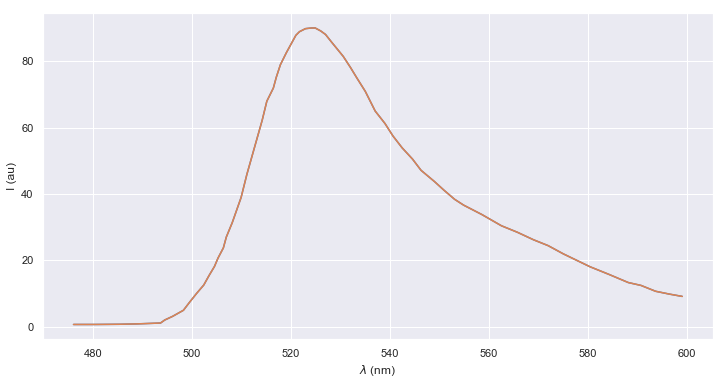

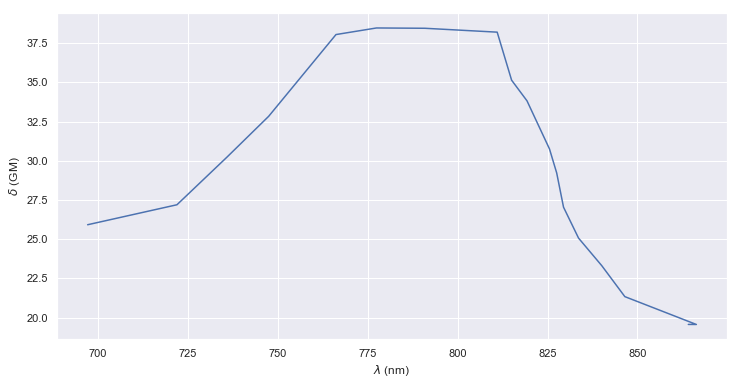

In [56]:
s2 = Setup(            setup_name             = 'Espinardo',
                        molecule_name          = 'FLUO3',
                        sample_name            = '2ba',
                        sample_concentration   = 1E+3/6 * nanomole/liter,
                        laser_lambda           = 800 * nm,
                        laser_power            = 100 * mW,
                        laser_eff              = 0.6,
                        laser_lambda_eff       = 1,
                        laser_f                = 76  * megahertz,
                        laser_tau              = 400 * femtosecond,
                        mc_name                = 'JMB',
                        mc_NA                  = 0.5,
                        mc_M                   = 20,
                        mc_eff_dic             = 0.7,
                        mc_eff_filt            = 1.0,
                        mc_eff_PMT             = 0.1,
                        n_pixels               = 256,
                        scan_length            = 90 * mum,
                        v_per_line             = 40)

In [58]:
avg_l03df = 35
F = s2.fluorescence(n_photons=2)
nf = s2.photons_per_pixel(n_photons=2)
pnm = s2.photons_per_pixel_per_molecule(n_photons=2)
nd = s2.detected_photons_per_pixel(n_photons=2)
IN = nd / avg_l03df
print(f' F = {F/us:5.1e}  photons/second')
print(f' nf = {nf:5.1e} photons/pixel (about 100 mus)')
print(f' nm = {pnm:5.1e} photons/pixel/molecule (about 100 mus)')
print(f' nd = {nd:5.1e} detected photons/pixel (about 100 mus)')
print(f' number of photons per count = {IN:5.1e} ')

 F = 3.5e+07  photons/second
 nf = 1.0e+03 photons/pixel (about 100 mus)
 nm = 6.2e+00 photons/pixel/molecule (about 100 mus)
 nd = 6.9e+01 detected photons/pixel (about 100 mus)
 number of photons per count = 2.0e+00 


## Summary

- Normalization (using 100 mW) consistent with normalization of 4ba. 
- Inconsistent dependence with Power. PB? Variable density?